In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IM_PATH = 'data/jiqing/images_train/0252/95.png'
LABEL_PATH = 'data/jiqing/Lane_Parameters/0252/95.txt'

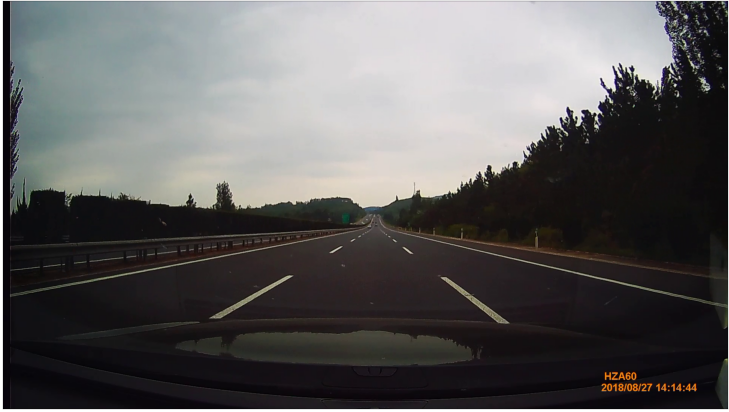

In [3]:
im = Image.open(IM_PATH)

fig, ax = plt.subplots(1, 1, figsize=(48, 27), dpi=20)
ax.imshow(im)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [4]:
with open(LABEL_PATH, 'r') as f:
    lanes = []
    for line in f.readlines():
        line = line.strip().split(':')[-1].replace(')(', ') (').split()
        lane = [tuple(map(float, x[1:-1].split(','))) for x in line]
        lanes.append(lane)

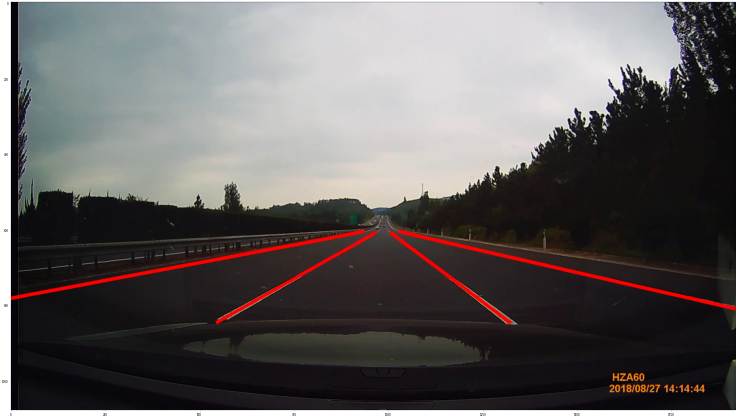

In [7]:
for lane in lanes:
    im_gt = ImageDraw.Draw(im)
    im_gt.line(lane, fill=(255, 0, 0), width=10)

fig, ax = plt.subplots(1, 1, figsize=(48, 27), dpi=20)
ax.imshow(im)
# ax.set_xticks([])
# ax.set_yticks([])
plt.show()

In [87]:
ORI_W, ORI_H = (1920, 1080)
SCA_W, SCA_H = (672, 384)

lanes_norm = [[x for x in lane] for lane in lanes]
lanes_norm = [[(x[0] * SCA_W / ORI_W, x[1] * SCA_H / ORI_H) for x in lane] for lane in lanes]

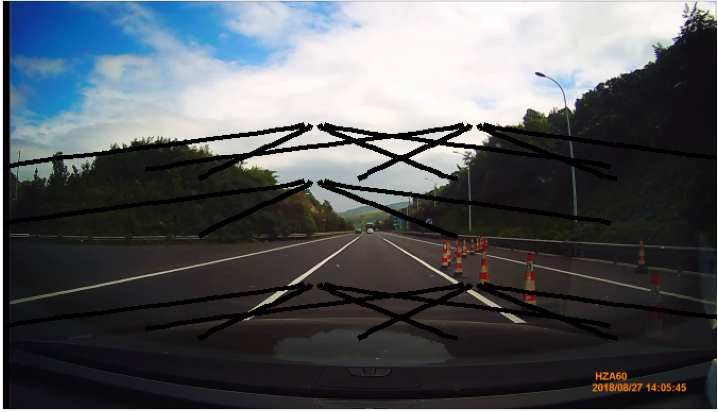

In [88]:
for lane in lanes_norm:
    im_gt = ImageDraw.Draw(im)
    im_gt.line(lane, fill=(0, 0, 0), width=5)

fig, ax = plt.subplots(1, 1, figsize=(48, 27), dpi=20)
ax.imshow(im)
ax.set_xticks([])
ax.set_yticks([])
plt.show()